# SML

This is a review of Supervised Machine Learning after a small hiatus!

## Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

X sample:
 [[  9.96346605   4.59676542]
 [ 11.0329545   -0.16816717]
 [ 11.54155807   5.21116083]]
y sample:
 [1 0 1]


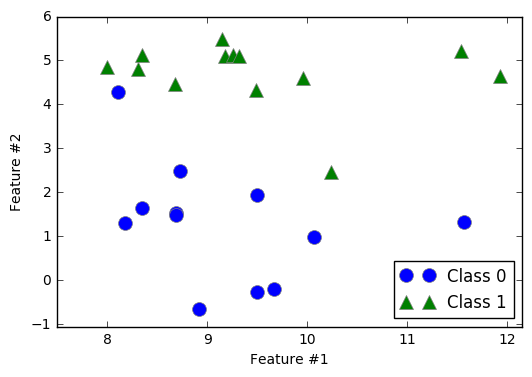

In [17]:
X, y = mglearn.datasets.make_forge()
print("X sample:\n {}".format(X[0:3, :]))
print("y sample:\n {}".format(y[0:3]))

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Feature #1")
plt.ylabel("Feature #2")

## Regression

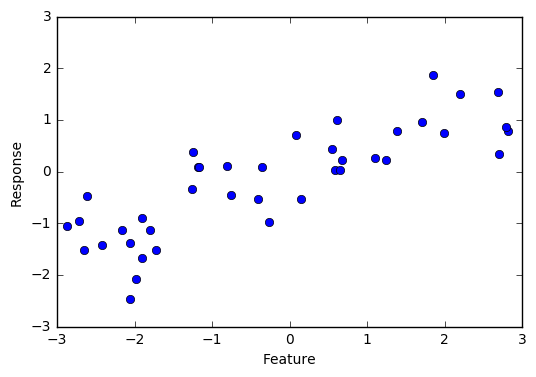

In [27]:
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Response")

## Cancer Dataset

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Shape of cancer dataset: {}".format(cancer["data"].shape))

Shape of cancer dataset: (569, 30)


In [39]:
print(cancer["target_names"])
print(np.bincount(cancer["target"]))

['malignant' 'benign']
[212 357]


In [44]:
print("{}".format({name: value for name, value in zip(cancer["target_names"], np.bincount(cancer["target"]))}))

{'malignant': 212, 'benign': 357}


In [46]:
cancer["feature_names"] # 36 of them

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

# Boston Dataset

In [48]:
from sklearn.datasets import load_boston
boston = load_boston()

type(boston)

sklearn.datasets.base.Bunch

In [49]:
boston.keys()

dict_keys(['target', 'DESCR', 'data', 'feature_names'])

In [61]:
X, y = mglearn.datasets.load_extended_boston()

X.shape # 104 features!! A result of feature engineering, and represents all **interactions**

(506, 104)

## k-Neighbors Classification

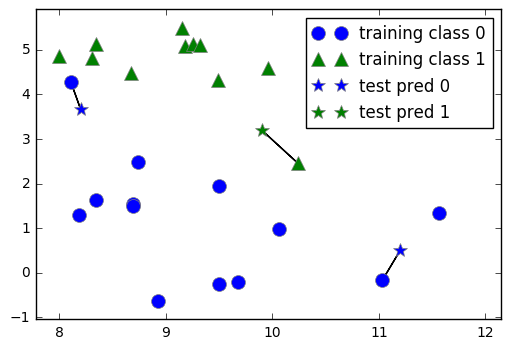

In [62]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

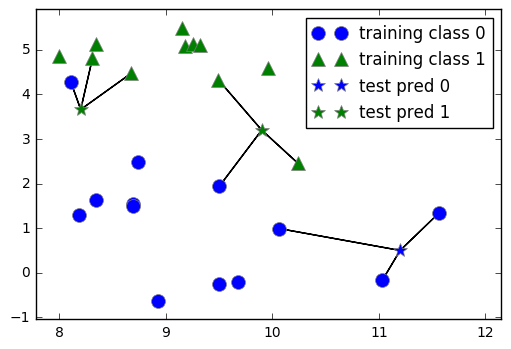

In [63]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [69]:
X, y = mglearn.datasets.make_forge()

print("Original X shape: {}".format(X.shape))
print("Original y shape: {}".format(y.shape))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("(How many examples are we training on?) X_train shape: {}".format(X_train.shape))
print("(How many examples are we testing on?) X_test.shape: {}".format(X_test.shape))

Original X shape: (26, 2)
Original y shape: (26,)
(How many examples are we training on?) X_train shape: (19, 2)
(How many examples are we testing on?) X_test.shape: (7, 2)


In [73]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
print("Predictions on test set: {}".format(model.predict(X_test)))

Predictions on test set: [1 0 1 0 1 0 0]


In [74]:
# Accuracy with KNeighborsClassifier.score(X_test, y_test)
print(knn_clf.score(X_test, y_test))

0.857142857143


## Analyzing KNeighbors Classifier